In [3]:
import requests
import pandas as pd 
import numpy as np 

In [4]:
def get_data(location):
	url = "https://zillow56.p.rapidapi.com/search"

	querystring = {"location":location,
				"isSingleFamily":"true",
				"isMultiFamily":"true",
				"isApartment":"true",
				"isCondo":"true","isTownhouse":"true",
				"beds_min":"4", 'baths_min': '4.5'
				}

	headers = {
		"X-RapidAPI-Key": "c68c7f4fa8msh2a64082d28a8e74p192586jsn98d6c6cab0ad",
		"X-RapidAPI-Host": "zillow56.p.rapidapi.com"
	}

	response = requests.request("GET", url, headers=headers, params=querystring)
	print('Response Code: ', response.status_code)
	out = response.json()
	print('Total Results found: ', out['totalResultCount'])
	response.close()
	return out, response

In [5]:
d, response  = get_data('30549')
#d = pd.read_json('data.json')

Response Code:  200
Total Results found:  13


In [6]:
print(d.keys())

tmp = pd.DataFrame.from_dict(d['results'])

print('\n',len(tmp))
print('\n', list(tmp.columns))

dict_keys(['results', 'resultsPerPage', 'totalPages', 'totalResultCount'])

 13

 ['bathrooms', 'bedrooms', 'city', 'country', 'currency', 'daysOnZillow', 'homeStatus', 'homeStatusForHDP', 'homeType', 'isFeatured', 'isNonOwnerOccupied', 'isPreforeclosureAuction', 'isPremierBuilder', 'isUnmappable', 'isZillowOwned', 'latitude', 'listing_sub_type', 'livingArea', 'longitude', 'lotAreaUnit', 'lotAreaValue', 'price', 'priceForHDP', 'rentZestimate', 'shouldHighlight', 'state', 'streetAddress', 'taxAssessedValue', 'zestimate', 'zipcode', 'zpid', 'videoCount', 'datePriceChanged', 'priceChange', 'priceReduction', 'newConstructionType', 'unit']


/Users/jerald/miniforge3/envs/dsenv/lib/python3.9/site-packages/seaborn/distributions.py:306: UserWarning: Dataset has 0 variance; skipping density estimate.
  warnings.warn(msg, UserWarning)
/Users/jerald/miniforge3/envs/dsenv/lib/python3.9/site-packages/seaborn/distributions.py:306: UserWarning: Dataset has 0 variance; skipping density estimate.
  warnings.warn(msg, UserWarning)


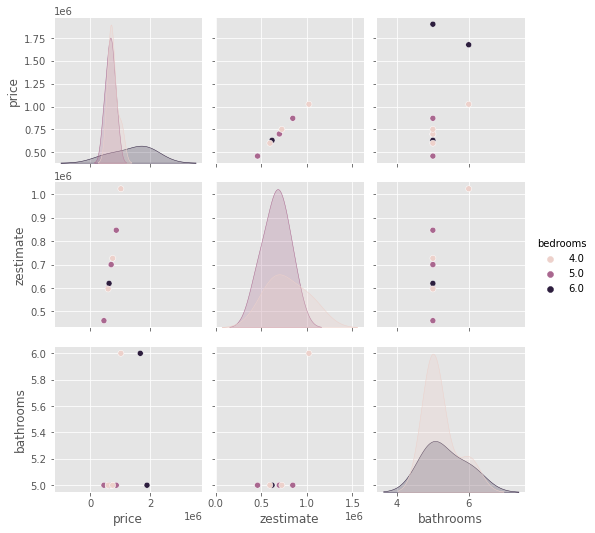

In [13]:
import seaborn as sns 
import matplotlib.pyplot as plt

plt.style.use('ggplot')
cols = 'streetAddress price zestimate bathrooms bedrooms city zipcode'.split(' ')

tmp[cols].sort_values('bedrooms')

sns.pairplot(tmp[cols], hue='bedrooms') 

In [12]:
#tmp[cols].sort_values(by='price', ascending=False)

In [8]:
import json 
# save the first search as a json file
first_search = d.copy()
with open('first_search.json', 'w') as outfile:
    json.dump(first_search, outfile)    

In [9]:
# Lets have a look at aggregated data for each state. We grapped the county csv from zillow website. 
# https://www.zillow.com/research/data/
url = 'https://files.zillowstatic.com/research/public_csvs/zhvi/County_zhvi_uc_sfrcondo_tier_0.33_0.67_sm_sa_month.csv?t=1662179583'
county = pd.read_csv(url, index_col=0)
county.columns

Index(['SizeRank', 'RegionName', 'RegionType', 'StateName', 'State', 'Metro',
       'StateCodeFIPS', 'MunicipalCodeFIPS', '2000-01-31', '2000-02-29',
       ...
       '2021-10-31', '2021-11-30', '2021-12-31', '2022-01-31', '2022-02-28',
       '2022-03-31', '2022-04-30', '2022-05-31', '2022-06-30', '2022-07-31'],
      dtype='object', length=279)

In [46]:
# Create a dictionary of the county names and their corresponding ID codes
rmaps = dict(zip(county.index, county['RegionName']))


In [51]:
col_drops = ['SizeRank','RegionName','RegionType','StateName','State','Metro','StateCodeFIPS','MunicipalCodeFIPS']
ga_df = county[county['State'] == 'GA'].drop(col_drops, axis=1).T.copy()
#ga_df = county.drop(col_drops, axis = 1).T.copy()
ga_df.columns = ga_df.columns.map(rmaps.get)
from IPython.display import display
display(ga_df.head())

RegionID,Fulton County,Gwinnett County,Dekalb County,Cobb County,Chatham County,Clayton County,Cherokee County,Henry County,Richmond County,Muscogee County,...,Stewart County,Warren County,Schley County,Echols County,Baker County,Clay County,Glascock County,Webster County,Quitman County,Taliaferro County
2000-01-31,190687.0,159121.0,163487.0,171353.0,115617.0,99830.0,175004.0,149344.0,NaN,119915.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,52630.0,NaN
2000-02-29,192152.0,159554.0,164208.0,171408.0,115947.0,100174.0,175553.0,149819.0,NaN,120087.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,53995.0,NaN
2000-03-31,193135.0,160041.0,164897.0,171938.0,116228.0,100498.0,176045.0,150217.0,NaN,120365.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,54613.0,NaN
2000-04-30,195210.0,161036.0,166408.0,172858.0,116759.0,101183.0,176878.0,151041.0,NaN,120744.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,55848.0,NaN
2000-05-31,196815.0,162055.0,167940.0,173970.0,117271.0,101860.0,177738.0,151559.0,NaN,121112.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,56410.0,NaN


In [53]:
# Need to multi Index this dataframe
tdf = ga_df.rolling(3).sum().pct_change().describe().loc[['mean','std','min','max']].T
tdf.sort_values(by='mean', ascending=False).round(2).head(10)

,mean,std,min,max
RegionID,,,,
Paulding County,0.02,0.01,0.01,0.04
Richmond County,0.01,0.00,0.01,0.02
Spalding County,0.01,0.01,-0.01,0.03
Crawford County,0.01,0.01,0.00,0.02
Brantley County,0.01,0.01,-0.00,0.03
Jenkins County,0.01,0.01,-0.00,0.02
Grady County,0.01,0.01,-0.00,0.02
Glascock County,0.01,0.01,-0.01,0.02
Newton County,0.00,0.01,-0.03,0.04


In [ ]:
import plotly.express as px 
px.line(ga_df, title='Georgia Housing Prices')